In [3]:
# WEBSCRAPING PART


# necessary libraries and modules
# website for scraping: immobilier.ch
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import time
import re
import pandas as pd
import requests

# open the browser
print("Openning browser...\n\n")
driver = webdriver.Firefox()
# open the url you would like to request
driver.get("https://www.immobilier.ch/en/rent/apartment-house/vaud/lausanne")

Openning browser...




In [4]:
# scraping all the links and saving them into "links" list
links = []
# Scraping only a few first pages
for i in range(2,31):
    try:
        # scrolling down to click the next page
        driver.execute_script("window.scrollTo(0, 3500)")
        containers = driver.find_elements_by_class_name("filter-item-container")
        time.sleep(1)
        # scraping links to the apartments
        for container in containers:
            try:
                link = container.find_element_by_css_selector("a").get_attribute("href")
                links.append(link)
            except NoSuchElementException:
                pass
        print("Page {} scraped, {} links found.".format(i-1,len(links)))    
        driver.find_element_by_xpath(("//a[text()='{}']").format(i)).click()
        time.sleep(2)
    except NoSuchElementException:
        print("Having problems")
print("done with scraping links!")

Page 1 scraped, 21 links found.
Page 2 scraped, 42 links found.
Page 3 scraped, 63 links found.
Page 4 scraped, 84 links found.
Page 5 scraped, 105 links found.
Page 6 scraped, 126 links found.
Page 7 scraped, 147 links found.
Page 8 scraped, 168 links found.
Page 9 scraped, 189 links found.
Page 10 scraped, 210 links found.
Page 11 scraped, 231 links found.
Page 12 scraped, 252 links found.
Page 13 scraped, 273 links found.
Page 14 scraped, 294 links found.
Page 15 scraped, 315 links found.
Page 16 scraped, 336 links found.
Page 17 scraped, 357 links found.
Page 18 scraped, 378 links found.
Page 19 scraped, 399 links found.
Page 20 scraped, 420 links found.
Page 21 scraped, 441 links found.
Page 22 scraped, 462 links found.
Page 23 scraped, 483 links found.
Page 24 scraped, 504 links found.
Page 25 scraped, 525 links found.
Page 26 scraped, 546 links found.
Page 27 scraped, 567 links found.
Page 28 scraped, 588 links found.
Page 29 scraped, 609 links found.
done with scraping links!


In [5]:
# SCRAPING MAIN INFO FROM EACH LINK
sqms = []
prices = []
for num, link in enumerate(links):
    url = link
    driver.get(url)
    # SQM
    try:
        SQM1 = driver.find_element_by_class_name("title").get_attribute("innerText")
        SQM = int(re.search("^\d+", SQM1).group(0))
        sqms.append(SQM)
    except NoSuchElementException:
        sqms.append("")
        
    # PRICE
    try:
        price1 = (driver.find_element_by_class_name("im__postDetails__price").find_element_by_tag_name(
            "strong").get_attribute("innerText"))
        price = int((re.search("\d'\d+", price1).group(0)).replace("'",""))
        prices.append(price)
    except: #NoSuchElementException:
        prices.append("")
    time.sleep(0.5)
print("Done with scraping from each link.\n\n")

Done with scraping from each link.




In [6]:
# checking list lengths to avoid any bugs, saving data into a csv file
pd.set_option('display.max_rows', None)
if len(sqms) ==  len(prices):
    print(("All lists has the same length ({})").format(len(sqms)))
    # creating data frame and saving it into a .csv file
    df = pd.DataFrame({"SQM": sqms, "Price": prices})
    print(df)
    df.to_csv("webscr_machinlearn.csv", index=False)
else:
    print("There is a potential bug, lists have different length!")


All lists has the same length (609)
     SQM Price
0    107  2100
1     77  1800
2     65  1550
3         2300
4     49  1340
5     51  1261
6     74  2300
7     60  1821
8     35      
9     30  1370
10    46  1250
11    68  1840
12   169  3930
13    86  1690
14    78  2100
15    67  1145
16    25      
17    73  1450
18        1580
19    23  1050
20    45  1590
21    24      
22    80  2700
23    48  1250
24    61  1470
25    46      
26    83  2650
27    95  2400
28        1250
29    41  1170
30    36  1170
31    60  1500
32    58  1625
33        2300
34        2980
35    46  1660
36            
37        1450
38    33  1220
39    22      
40        1400
41            
42    81  1900
43    47  1005
44    74  2150
45   115  2400
46    63  1560
47    87  1750
48    28  1100
49    20  1000
50        1300
51    80  1810
52    61  1470
53    60  1650
54    84  1800
55    72  2500
56    49  1220
57    27      
58    41  1350
59    62  1990
60    87  1780
61   170  6500
62            
63  

In [7]:
# MACHINE LEARNING PART
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mpl_toolkits
%matplotlib inline

# data cleaning
# turn empty cells into Nan values
df = pd.read_csv("webscr_machinlearn.csv")
df.replace("", np.nan, inplace=True)
# remove Nan values
df.dropna(subset = ["SQM", "Price"], inplace=True)
# give new index number
df.reset_index(drop=True)

,SQM,Price
0,107.0,2100.0
1,77.0,1800.0
2,65.0,1550.0
3,49.0,1340.0
4,51.0,1261.0
5,74.0,2300.0
6,60.0,1821.0
7,30.0,1370.0
8,46.0,1250.0
9,68.0,1840.0


In [8]:
# key statistics
df.describe()

,SQM,Price
count,438.000000,438.000000
mean,69.908676,1916.399543
std,31.490231,902.358219
min,20.000000,1000.000000
25%,50.000000,1350.000000
50%,63.000000,1627.500000
75%,83.000000,2185.750000
max,219.000000,7000.000000


Text(0.5, 1.0, 'Price vs SQM')

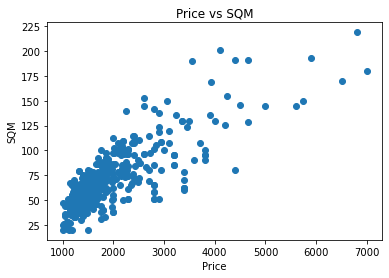

In [9]:
# scatterplot to see if linear regression is possible to build
plt.scatter(df.Price, df.SQM)
plt.xlabel("Price")
plt.ylabel("SQM")
plt.title("Price vs SQM")


array([[<AxesSubplot:title={'center':'SQM'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

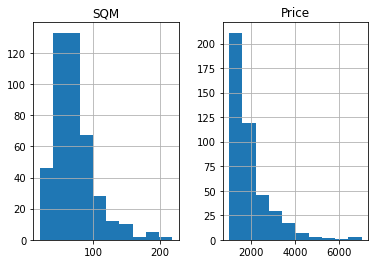

In [10]:
# are there any outliers?
# checking distribution
# Skewed Right / Positive Skew
df.hist()

C:\Users\potek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


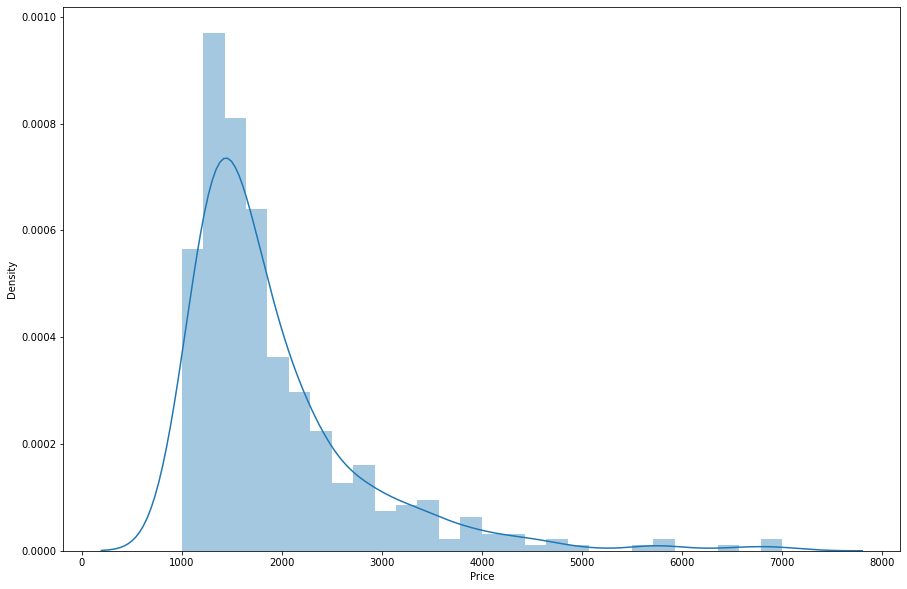

In [11]:
# better look at Price distribution plot
import seaborn as sns
plt.figure(figsize=(15,10))
plt.tight_layout()
print(sns.distplot(df['Price']))

C:\Users\potek\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


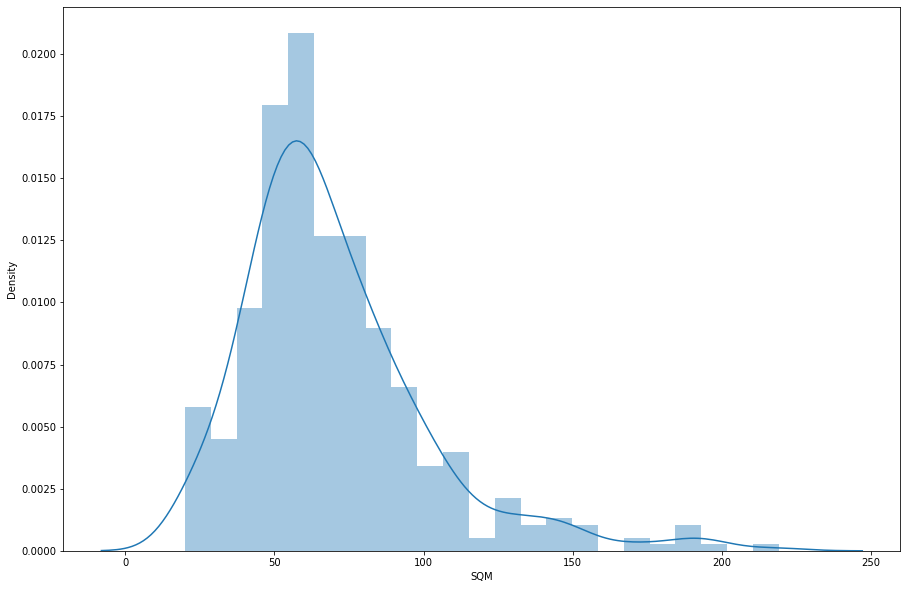

In [12]:
# better look at SQM distribution plot
plt.figure(figsize=(15,10))
plt.tight_layout()
print(sns.distplot(df['SQM']))

In [13]:
# positive skeweness  = mean > median > mode
# any skeweness can lead to a bad prediction model and a poor accuracy
print("MEAN:\n", df.mean(), "\n")


print("MEDIAN:\n", df.median(), "\n")


print("MODE:\n", df.mode(), "\n")

MEAN:
 SQM        69.908676
Price    1916.399543
dtype: float64 

MEDIAN:
 SQM        63.0
Price    1627.5
dtype: float64 

MODE:
     SQM   Price
0  60.0  1450.0 



In [14]:
# trying to build prediction model using Linear Regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# divide the data into “attributes” (independent variables) and “labels” (values that need to be predicted)

''' You should call .reshape() on x because this array is required to be two-dimensional, 
    or to be more precise, to have one column and as many rows as necessary. 
    That’s exactly what the argument (-1, 1) of .reshape() specifies. '''

X = df['SQM'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

# split 80% of the data to the training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training
#To retrieve the intercept:
# intercept_ illustrates that your model predicts the response of n when 𝑥 is zero
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
print(("For every one unit of change in SQM, the change in price is around {:0.2f}%").format(regressor.coef_[0][0]))

[316.10080598]
[[23.14908685]]
For every one unit of change in SQM, the change in price is around 23.15%


In [15]:
# time to make some predictions
# we will use our test data and see how accurately our algorithm predicts the percentage score
y_pred = regressor.predict(X_test)
# compare the actual output values for X_test with the predicted values
dfnew = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfnew

,Actual,Predicted
0,1550.0,1566.151496
1,3700.0,2793.053098
2,1050.0,871.678890
3,1262.0,1242.064280
4,2200.0,2052.282319
5,2100.0,2121.729580
6,1050.0,871.678890
7,3000.0,2631.009491
8,1390.0,1867.089625
9,1450.0,1543.002409


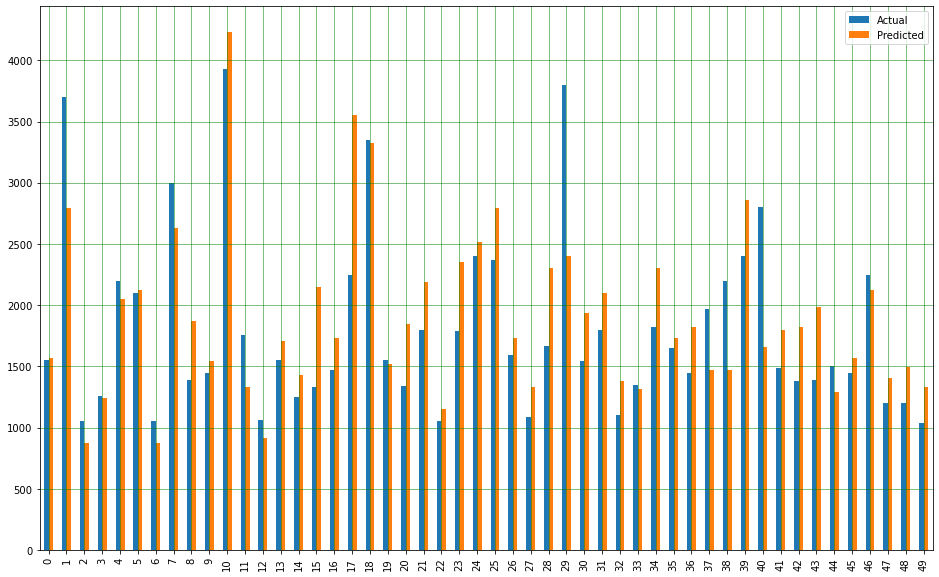

In [16]:
# visualize comparison result as a bar graph (doing only 50, otherwise gets messy)
df1 = dfnew.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

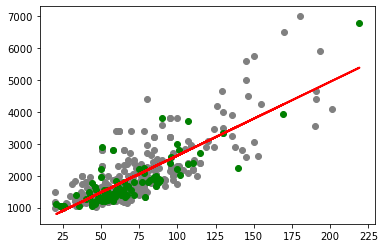

In [17]:
# plot our straight line with the test data

plt.scatter(X_train, y_train,  color='gray') # train data
plt.plot(X_test, y_pred, color='red',linewidth=2) # predicted data
plt.scatter(X_test, y_test, color='green') # test data
plt.show()
# plot our straight line with the test data
# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
# plt.show()

In [18]:
# evaluate performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 344.1965696780238
Mean Squared Error: 210224.22704903453
Root Mean Squared Error: 458.50215599169707


In [19]:
# accuracy score
# obtain the coefficient of determination (𝑅²) with .score() 
''' .score() method will take in an input X_test, and it's target value Y_test, your model will compute 
    Y_pred for your X_test, and attribute a score, using the optimization function used by your model 
    to your prediction. You can't feed 2 target values to a model, you feed to it an input and it gives you a result,
    the score method() does that plus the real target value for evaluation, yes sure metric functions take in
    y_pred and y_test but it's built in your model so it does that for you. So you have to pass just the test sets. 
'''
regressor.score(X_test, y_test)

0.6976102569788576

In [20]:
# another way to calculate the score
''' Unlike the simple score, r2_score requires ready predictions - it does not calculate them under the hood.
    r2_score and score are the same - they are just different ways of calculating the coefficient of determination'''
from sklearn.metrics import r2_score
preds = regressor.predict(X_test)

r2_score(y_test, preds)

0.6976102569788576

In [21]:
X_predict = [[75]]  # predicting price for x number square meters
y_predict = regressor.predict(X_predict)
y_predict

array([[2052.28231937]])

In [ ]:
# if you want to save the model to disk
# import joblib
# filename = 'finalized_model.sav'
# joblib.dump(regressor, filename)
 
# some time later...
 
# load the model from disk
#loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)